# Bias - Variance 

There are 3 types of prediction error: bias, variance, and irreducible error.


**Total Error = Bias^2 + Variance + Irreducible Error**

### Error from Bias

**Bias** is the difference between your model's expected predictions and the true values.

![alt text](noisy-sine-linear.png)


### Error from Variance

**Variance** refers to your algorithm's sensitivity to specific sets of training data.



![alt text](noisy-sine-decision-tree.png)


### The Bias-Variance Tradeoff


**Let's do a thought experiment:**

1. Imagine you've collected 5 different training sets for the same problem.
2. Now imagine using one algorithm to train 5 models, one for each of your training sets.
3. Bias vs. variance refers to the accuracy vs. consistency of the models trained by your algorithm.

![alt text](Bias-vs.-Variance-v5-2-darts.png)


**High bias** algorithms tend to be less complex, with simple or rigid underlying structure.

+ They train models that are consistent, but inaccurate on average.
+ These include linear or parametric algorithms such as regression and naive Bayes.

On the other hand, **high variance** algorithms tend to be more complex, with flexible underlying structure.

+ They train models that are accurate on average, but inconsistent.
+ These include non-linear or non-parametric algorithms such as decision trees and nearest neighbors.

### Bias-Variance Tradeoff

This tradeoff in complexity is why there's a tradeoff in bias and variance - an algorithm cannot simultaneously be more complex and less complex.

**Total Error = Bias^2 + Variance + Irreducible Error**

![alt text](Bias-vs.-Variance-v4-chart.png)


![alt text](noisy-sine-third-order-polynomial.png)


**A proper machine learning workflow includes:**

* Separate training and test sets
* Trying appropriate algorithms (No Free Lunch)
* Fitting model parameters
* Tuning impactful hyperparameters
* Proper performance metrics
* Systematic cross-validation

# Train Test Split

**How do we know if our model is overfitting or underfitting?**



Test our model on unseen data. 
Measure our performance on the unseen data.

The previous module introduced the idea of dividing your data set into two subsets:

* **training set** —a subset to train a model.
* **test set**—a subset to test the trained model.

You could imagine slicing the single data set as follows:

![alt text](testtrainsplit.png)

**Never train on test data.** If you are seeing surprisingly good results on your evaluation metrics, it might be a sign that you are accidentally training on the test set. 

![alt text](https://developers.google.com/machine-learning/crash-course/images/WorkflowWithTestSet.svg)

## Model Evaluation Metrics for Regression

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:



![alt text](mae.png)

**Mean Squared Error** (MSE) is the mean of the squared errors:

![alt text](mse.png)

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:



![alt text](rmse.png)

MSE is more popular than MAE because MSE "punishes" larger errors. But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.

# Practicum

In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [85]:
# Load the Diabetes Housing dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu y".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.read_csv('diabetes.tab.txt', sep='\t', lineterminator='\n')
# df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
df.columns=columns


In [86]:
df.head(10)

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310


In [87]:
target = df.y # define the target variable (dependent variable) as y
features = df.iloc[:, :-1]

https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c

In [88]:
features.head(10)

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88


In [32]:
features.groupby(['sex']).mean()

,age,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
sex,,,,,,,,,,
1,46.382979,26.010638,91.521957,187.995745,111.372340,54.385106,3.668468,4.567993,89.017021,149.021277
2,50.942029,26.790338,98.194783,190.439614,120.056039,44.570048,4.526377,4.724760,93.806763,155.666667


In [89]:
features['female'] = features.sex.map({1:1, 2:0})


In [90]:
features.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,female
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,0
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,1
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,0
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,1
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,1


In [91]:
features.drop(columns=['sex'], inplace=True)

In [92]:
features.head()

,age,bmi,map,tc,ldl,hdl,tch,ltg,glu,female
0,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,0
1,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,1
2,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,0
3,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,1
4,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,1


In [93]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(353, 10) (353,)
(89, 10) (89,)


In [94]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

Text(0,0.5,'Predictions')

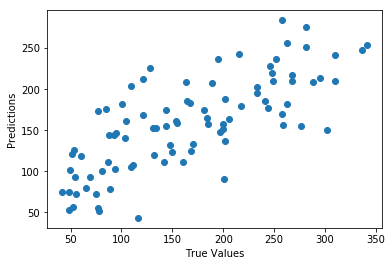

In [95]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [96]:
print ("Score:", model.score(X_test, y_test))


Score: 0.5496539094948476


In [98]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

44.078665623837814
2961.8086048750033
54.422500906105036


In [99]:
target.mean()

152.13348416289594

Normalizing variables is mandatory when you use techniques like LASSO, Ridge Regression or Elastic Net, as these approaches use the magnitude of the estimated coefficients to rank the independent variables. If you don’t normalize your data, your results will be skewed.

With OLS, it makes sense when your software uses gradient descent or a related approach to find the optimal vector of coefficients. If it uses the Normal Equation, normalization is not necessary.

There is one more great benefit to normalization, that often gets overlooked: When you normalized your independent variables: it helps you in ordering your variables by importance (no, p-values won’t do the job). When you normalize your independent variables, you will quickly see which ones are more important, as their absolute coefficient values will be larger than the ones of less important variables.

In [102]:
df_64 = pd.read_csv('data64.txt', sep='\t', lineterminator='\n')
features_64 = df_64

In [103]:
features_64.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,...,ldl:hdl,ldl:tch,ldl:ltg,ldl:glu,hdl:tch,hdl:ltg,hdl:glu,tch:ltg,tch:glu,ltg:glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,...,0.042355,-0.022038,-0.031125,-0.000922,0.033494,0.000852,0.031150,-0.028191,-0.017658,-0.027794
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,...,-0.021256,-0.011564,0.012973,0.023783,-0.023815,-0.094506,-0.140378,0.025298,0.053034,0.104013
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,...,0.033587,-0.022063,-0.018016,0.004913,0.032956,0.018281,0.032795,-0.027332,-0.017236,-0.022304
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,...,-0.009878,-0.009984,-0.003373,-0.019109,0.008159,0.001898,0.021514,-0.012045,-0.024872,-0.025042
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,...,0.012376,-0.024091,-0.026846,-0.029687,0.030984,0.014489,0.005386,-0.025575,-0.016180,0.008735


In [108]:
# create training and testing vars
X_train_64, X_test_64, y_train_64, y_test_64 = train_test_split(features_64, target, random_state=34,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 64) (353,)
(89, 64) (89,)


In [109]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred_64 = lm.predict(X_test)

Text(0,0.5,'Predictions')

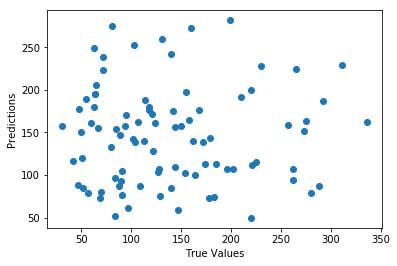

In [110]:
## The line / model
plt.scatter(y_test_64, y_pred_64)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [112]:
print ("Score:", model.score(X_test_64, y_test_64))


Score: 0.4514775019139404


In [113]:
print(metrics.mean_absolute_error(y_test_64, y_pred_64))
print(metrics.mean_squared_error(y_test_64, y_pred_64))
print(np.sqrt(metrics.mean_squared_error(y_test_64, y_pred_64)))

74.61602857590452
8431.479344006933
91.82308720581624
